In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
import matplotlib.pyplot as plt


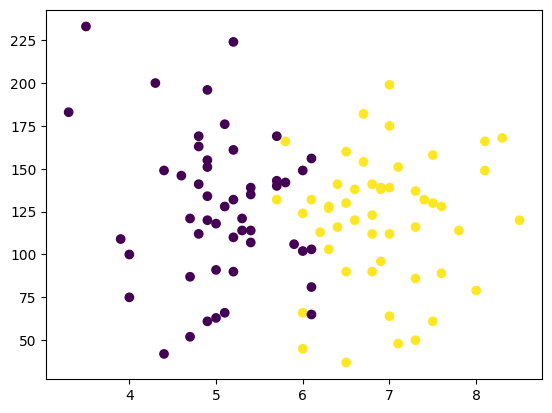

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,Unnamed: 0,cgpa
12,12,5.4
13,13,6.4
53,53,8.3
96,96,4.4
8,8,6.1
...,...,...
83,83,7.5
74,74,6.7
69,69,8.5
19,19,5.2


In [ ]:
y_train

,placement
12,0
13,1
53,1
96,0
8,0
...,...
83,1
74,1
69,1
19,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)


In [ ]:
x_train

array([[-1.26368017, -0.52871814],
       [-1.22843653,  0.33176346],
       [ 0.18130893,  1.96667851],
       [ 1.6967853 , -1.38919974],
       [-1.40465472,  0.07361898],
       [ 1.06239984,  0.07361898],
       [-1.08746199, -2.33572951],
       [ 0.67471984, -0.87291078],
       [-1.36941108, -0.78686262],
       [ 0.00509075,  0.50385978],
       [-0.38258925,  1.79458219],
       [-0.31210198, -1.21710342],
       [ 1.27386166, -0.27057366],
       [ 0.88618166, -0.95895894],
       [-0.84075653, -1.13105526],
       [-0.20637107,  1.36434139],
       [-1.65136017, -0.09847734],
       [-1.15794926, -0.78686262],
       [ 0.46325802,  1.10619691],
       [ 0.04033438, -0.52871814],
       [ 1.66154167, -1.4752479 ],
       [ 1.16813075, -0.52871814],
       [ 0.2517962 ,  1.53643771],
       [ 1.37959257, -0.27057366],
       [-1.1931929 ,  0.07361898],
       [-1.29892381,  0.76200426],
       [-0.9112438 , -0.95895894],
       [ 0.56898893,  0.84805242],
       [-0.73502562,

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.95666893, -1.0450071 ],
       [-1.68660381,  0.6759561 ],
       [ 1.34434894, -0.78686262],
       [ 0.28703984,  0.07361898],
       [ 1.59105439,  0.6759561 ],
       [ 1.55581076, -0.70081446],
       [-0.27685835, -0.95895894],
       [ 1.76727258,  0.2457153 ],
       [ 0.14606529,  0.84805242],
       [ 0.11082166, -1.0450071 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_test

,placement
75,0
0,1
86,0
56,0
93,1
92,0
40,0
98,1
52,1
51,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

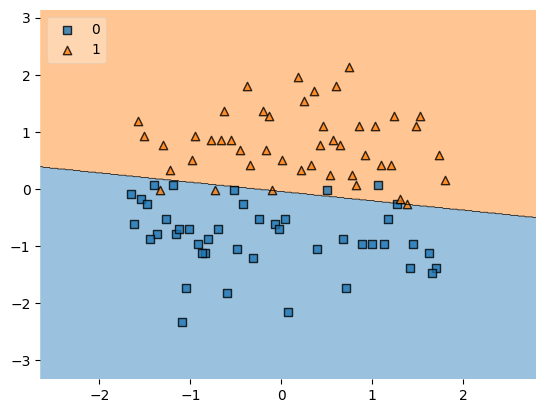

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))